In [1]:
#standard normal shaped curve: central point is 0 zcore
#it is assumed(in most cases) that we have data until 3 standard distributions(-3 to +3)
#sig sigma rule(6 data bands)
#above is zscore method(-3 to +3 zscore)
#values outside these 6 bands are considered as outliers
#this method is for removing outliers

In [2]:
#if outliers need to be considered, use other method

In [3]:
import scipy
from scipy.stats import skew,norm,zscore
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df['zscore'] = zscore(df['total_bill'])
df[(df['zscore']>3) | (df['zscore']<-3)]

,total_bill,tip,sex,smoker,day,time,size,zscore
59,48.27,6.73,Male,No,Sat,Dinner,4,3.206166
156,48.17,5.00,Male,No,Sun,Dinner,6,3.194910
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.492068
212,48.33,9.00,Male,No,Sat,Dinner,4,3.212919


In [6]:
a = df[(df['zscore']<3) & (df['zscore']>-3)]

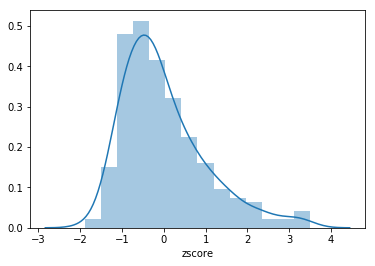

In [7]:
sns.distplot(df['zscore'])

In [8]:
df['zscore'].skew()

1.1332130376158205

In [9]:
a['zscore'].skew()

0.914851026149

In [10]:
df[(df['zscore']<3) & (df['zscore']>-3)].count()

total_bill    240
tip           240
sex           240
smoker        240
day           240
time          240
size          240
zscore        240
dtype: int64

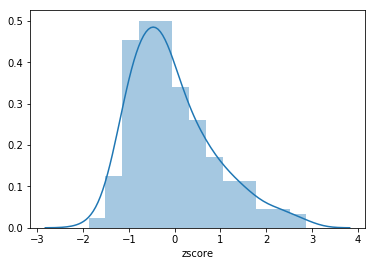

In [11]:
sns.distplot(a['zscore'])

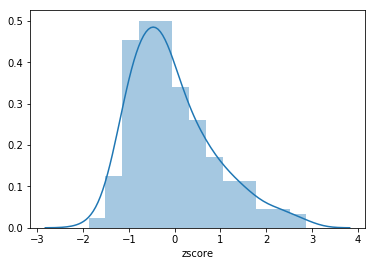

In [81]:
sns.distplot(df[(df['zscore']<3) & (df['zscore']>-3)]['zscore'])

In [13]:
df.count()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
zscore        244
dtype: int64

In [14]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [15]:
df['zscore'].kurtosis()

1.2184840156638836

In [16]:
a['zscore'].kurtosis()

0.5355590055930728

In [17]:
df[(df['zscore']<3) & (df['zscore']>-3)].max()['total_bill']

45.35

In [18]:
#Emperical features

In [19]:
#this emperical rule holds true only for bell shaped curves
#states that between one standard deviation, 34% of data lies and hence within -1 to 1(zscore), 68% of data lay. Similarly
#between 2 standard deviations, 47.5% of data lies, and hence 95% of data lay between -2 to +2.
#between 0 to 3, 49.85%, and hence -3 to +3 99.7%

In [20]:
#IQR method

Q2 = Median
Q1 = 25th %ile
Q3 = 75th %ile
UL = Q3+1.5IQR
LL = Q1-1.5IQR

In [21]:
q2 = df['total_bill'].median()
q1 = df['total_bill'].quantile(q=0.25)
q3 = df['total_bill'].quantile(q=0.75)
IQR = q3-q1
UL = q3+1.5*IQR
LL = q1-1.5*IQR
df[(df['total_bill']>UL)|(df['total_bill']<LL)]

,total_bill,tip,sex,smoker,day,time,size,zscore
59,48.27,6.73,Male,No,Sat,Dinner,4,3.206166
102,44.30,2.50,Female,Yes,Sat,Dinner,3,2.759302
142,41.19,5.00,Male,No,Thur,Lunch,5,2.409241
156,48.17,5.00,Male,No,Sun,Dinner,6,3.194910
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.492068
182,45.35,3.50,Male,Yes,Sun,Dinner,3,2.877490
184,40.55,3.00,Male,Yes,Sun,Dinner,2,2.337202
197,43.11,5.00,Female,Yes,Thur,Lunch,4,2.625356
212,48.33,9.00,Male,No,Sat,Dinner,4,3.212919


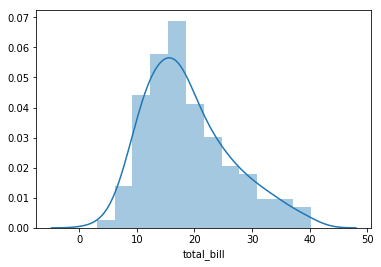

In [22]:
sns.distplot(df[(df['total_bill']<UL)&(df['total_bill']>LL)]['total_bill'])

In [23]:
df[(df['total_bill']<UL)&(df['total_bill']>LL)]['total_bill'].max()

40.17

In [24]:
df[(df['total_bill']<UL)&(df['total_bill']>LL)]['total_bill'].skew()

0.7255976389840281

In [25]:
df[(df['total_bill']<UL)&(df['total_bill']>LL)]['total_bill'].kurt()

0.050898514819063934

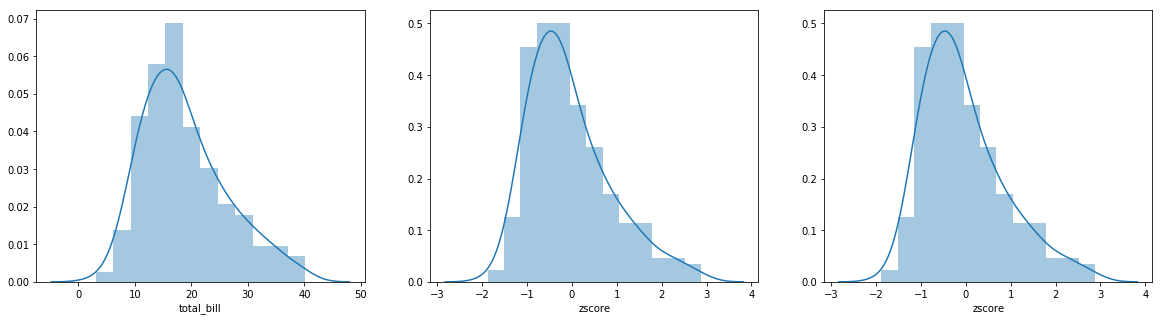

In [26]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

sns.distplot(df[(df['total_bill']<UL)&(df['total_bill']>LL)]['total_bill'],ax=ax[0])
sns.distplot(df[(df['zscore']<3) & (df['zscore']>-3)]['zscore'],ax=ax[1])
sns.distplot(a['zscore'],ax=ax[2])
plt.show()

#boxplot
78,88,90,100,150,120
so 150 and 120 are outliers
and calculated UL would be let's say 115
so the upper and lower whiskers are the min and max points contained in the UL and LL
so the upper whisker in this case would be 100(as it is contained in 115(below 115))

In [27]:
#Dealing with categorical data
df.head()

,total_bill,tip,sex,smoker,day,time,size,zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [28]:
#encoder's technique/label encoding:converting data to specific values(like 0,1,2,3...)

In [29]:
#problem is that it has weights. so, it useful for 2 quantities(binary), but problematic if there are more quantities

In [30]:
#one hot encoding/in dummy's method, we will take let's say column with three cities(A,B,C), so dummy's will create 3 tables which will have 0
#1 for the presence of each city in that particular row

In [31]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [56]:
df['encoded_sex'] = df['sex'].replace({'Female':1,'Male':0})
#df['encoded_sex'] = df['sex'].replace({'Female':1,'Male':0}).astype('float')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
total_bill     244 non-null float64
tip            244 non-null float64
sex            244 non-null category
smoker         244 non-null category
day            244 non-null category
time           244 non-null category
size           244 non-null int64
zscore         244 non-null float64
encoded_sex    244 non-null int64
dtypes: category(4), float64(3), int64(2)
memory usage: 11.0 KB


In [59]:
df['LabelEncoder'] = df['sex'].map({'Male':0,'Female':1})

In [60]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,zscore,encoded_sex,LabelEncoder,minmax,label
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711,1,1,0.291579,0
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235,0,0,0.152283,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780,0,0,0.375786,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315,0,0,0.431713,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745,1,1,0.450775,0


In [65]:
d = pd.get_dummies(df['sex']).head()
print(d.head())
print(pd.get_dummies(df['day']).tail())

   Male  Female
0     0       1
1     1       0
2     1       0
3     1       0
4     0       1
     Thur  Fri  Sat  Sun
239     0    0    1    0
240     0    0    1    0
241     0    0    1    0
242     0    0    1    0
243     1    0    0    0


In [79]:
pd.get_dummies(df['day']).head()

,Thur,Fri,Sat,Sun
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [69]:
pd.get_dummies(df['day'],drop_first=True).head()

,Fri,Sat,Sun
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [39]:
e = pd.get_dummies(df,columns=['sex','time'])
e.head()

,total_bill,tip,smoker,day,size,zscore,encoded_sex,LabelEncoder,sex_Male,sex_Female,time_Lunch,time_Dinner
0,16.99,1.01,No,Sun,2,-0.314711,1,1,0,1,0,1
1,10.34,1.66,No,Sun,3,-1.063235,0,0,1,0,0,1
2,21.01,3.50,No,Sun,3,0.137780,0,0,1,0,0,1
3,23.68,3.31,No,Sun,2,0.438315,0,0,1,0,0,1
4,24.59,3.61,No,Sun,4,0.540745,1,1,0,1,0,1


In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
minmax = MinMaxScaler()

In [82]:
df['minmax'] = minmax.fit_transform(df[['total_bill']])

In [87]:
print(df['minmax'].kurt())
print(df['total_bill'].kurt())

1.2184840156638836
1.2184840156638854


In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
label = LabelEncoder()

In [46]:
df['label'] = label.fit_transform(df['smoker'])

In [47]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size,zscore,encoded_sex,LabelEncoder,minmax,label
239,29.03,5.92,Male,No,Sat,Dinner,3,1.040511,0,0,0.543779,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.832275,1,1,0.505027,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.324630,0,0,0.410557,1
242,17.82,1.75,Male,No,Sat,Dinner,2,-0.221287,0,0,0.308965,0
243,18.78,3.00,Female,No,Thur,Dinner,2,-0.113229,1,1,0.329074,0


In [48]:
df.ix[0,0]

C:\Users\shaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


16.99

In [49]:
from sklearn.model_selection import train_test_split

In [78]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)

In [51]:
xtrain.shape

(170, 11)

In [52]:
ytrain.shape

(170,)

In [53]:
xtest.shape

(74, 11)

In [54]:
ytest.shape

(74,)